In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [2]:
!pip install scipy

<ipython-input-11-680993c5d7f1>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, np.real(conv_result), use_line_collection=True)


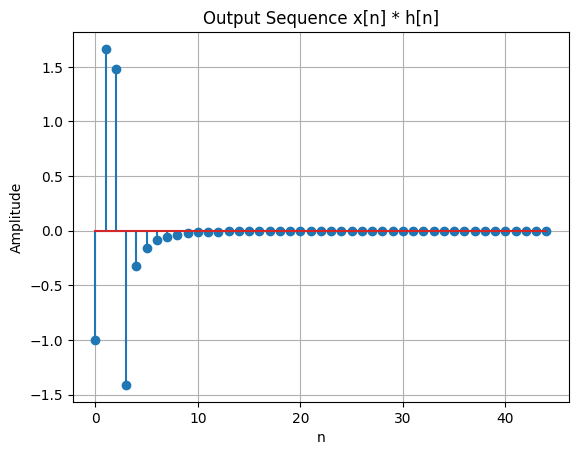

In [11]:
n = np.arange(45)  # n from 0 to 44
x_n = np.zeros(45, dtype=complex)  # Ensure x_n is complex
h_n = np.array([-1, 2, 1, -2], dtype=complex)  # Ensure h_n is complex

# Calculate x[n] combinatorially
for i in range(len(n)):
    x_n[i] = np.math.comb(3 * n[i], n[i]) * (1/9)**n[i]

# Define the block size (size of DFT)
block_size = 16


conv_result = np.zeros(len(x_n), dtype=complex)  # Ensure conv_result is complex

for i in range(0, len(x_n), block_size):
    x_block = x_n[i:i+block_size]
    h_block = h_n if i == 0 else np.zeros(len(h_n), dtype=complex)
    X = fft(x_block, block_size)
    H = fft(h_block, block_size)
    Y = X * H
    y_block = ifft(Y, block_size)

    # Update the convolution result considering the block size and position
    if i + block_size <= len(conv_result):
        conv_result[i:i+block_size] += y_block
    else:
        conv_result[i:] += y_block[:len(conv_result) - i]

# Plot the real part of the output sequence using stem
plt.stem(n, np.real(conv_result), use_line_collection=True)
plt.title("Output Sequence x[n] * h[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
